# Практика с rnn

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN#, LSTM, GRU

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


RND_SEED = 7
plt.style.use('ggplot')

np.random.seed(RND_SEED)

%matplotlib inline

# Прогнозирование временных рядов

In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/demidovakatya/mashinnoye-obucheniye/master/5-data-analysis-applications/1_1_time_series/monthly-australian-wine-sales.csv')
dataset = df.loc[:, ['sales']].values.astype(np.float32)

Отнормируем данные и разобъем их на обучение и контроль

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[:train_size, :], dataset[train_size:, :]

Переведем их в нужный фоомат

In [0]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
# Создаем сеточку
model = Sequential()
model.add(SimpleRNN(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """




Epoch 1/100
 - 5s - loss: 0.1889
Epoch 2/100
 - 0s - loss: 0.0446
Epoch 3/100
 - 0s - loss: 0.0371
Epoch 4/100
 - 1s - loss: 0.0371
Epoch 5/100
 - 1s - loss: 0.0364
Epoch 6/100
 - 0s - loss: 0.0363
Epoch 7/100
 - 1s - loss: 0.0358
Epoch 8/100
 - 0s - loss: 0.0357
Epoch 9/100
 - 1s - loss: 0.0357
Epoch 10/100
 - 0s - loss: 0.0354
Epoch 11/100
 - 0s - loss: 0.0357
Epoch 12/100
 - 0s - loss: 0.0351
Epoch 13/100
 - 1s - loss: 0.0350
Epoch 14/100
 - 1s - loss: 0.0351
Epoch 15/100
 - 0s - loss: 0.0359
Epoch 16/100
 - 1s - loss: 0.0349
Epoch 17/100
 - 1s - loss: 0.0348
Epoch 18/100
 - 0s - loss: 0.0347
Epoch 19/100
 - 1s - loss: 0.0350
Epoch 20/100
 - 1s - loss: 0.0352
Epoch 21/100
 - 1s - loss: 0.0357
Epoch 22/100
 - 0s - loss: 0.0348
Epoch 23/100
 - 1s - loss: 0.0348
Epoch 24/100
 - 0s - loss: 0.0351
Epoch 25/100
 - 1s - loss: 0.0351
Epoch 26/100
 - 0s - loss: 0.0349
Epoch 27/100
 - 0s - loss: 0.0350
Epoch 28/100
 - 0s - loss: 0.0348
Epoch 29/100
 - 0s - loss: 0.0349
Epoch 30/100
 - 0s - 

KeyboardInterrupt: ignored

In [0]:
?SimpleRNN

In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Обратное преобразование scaler
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Считаем ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4911.99 RMSE
Test Score: 5705.23 RMSE


Нарисуем предсказания

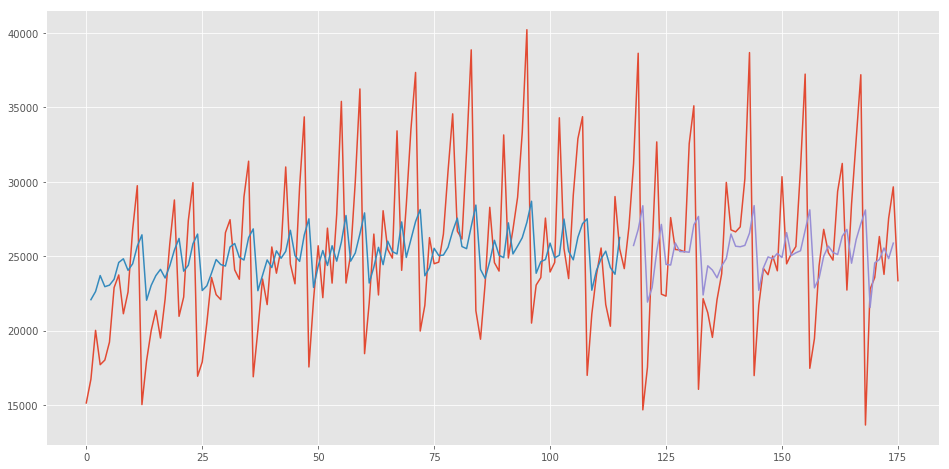

In [0]:
plt.figure(figsize=(16, 8))
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)


In [0]:
?plt.figure

# Тональность отзыва

In [0]:
from keras.datasets import imdb
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [0]:
np.random.seed(RND_SEED)

Загрузим датасет

In [0]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

/usr/local/lib/python3.6/dist-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


In [0]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

Необходимо привести все к однообразной форме

In [0]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [0]:
from keras.optimizers import Adam

In [0]:
Adam(clip_norm = 1.0)

In [0]:
# Создаем модель
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 173,401
Trainable params: 173,401
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
24768/25000 [============================>.] - ETA: 1s - loss: 0.6623 - acc: 0.5770

In [0]:
# сделайте tf idf + log reg baseline (опционально)

In [0]:
# Качество 

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Теперь попробуем добавить Dropout

In [0]:
from keras.layers import Dropout